In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import mne
import random
from multiprocessing import Process
from meegkit import dss
from eeg_clean import clean, epoch_stats
from data_quality import ica_score
from plotting.templates import plot_dens_scatter, plot_n_boxplots

In [2]:
stab_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\accumulate")
results_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_0")

Analysing the epoch distribution of the raw data

In [3]:
quasi_dist_x = np.empty((32, 120))
quasi_dist_y = np.empty((32, 120))
peaks_dist_x = np.empty((32, 120))
peaks_dist_y = np.empty((32, 120))

In [4]:
for i, pth in enumerate((stab_folder / "quasi" / "dis").iterdir()):
    current = np.load(pth)
    quasi_dist_x[i, :] = current.copy()
for i, pth in enumerate((stab_folder / "quasi" / "abs_dis").iterdir()):
    current = np.load(pth)
    quasi_dist_y[i, :] = current.copy()
for i, pth in enumerate((stab_folder / "peaks" / "dis").iterdir()):
    current = np.load(pth)
    peaks_dist_x[i, :] = current.copy()
for i, pth in enumerate((stab_folder / "peaks" / "abs_dis").iterdir()):
    current = np.load(pth)
    peaks_dist_y[i, :] = current.copy()

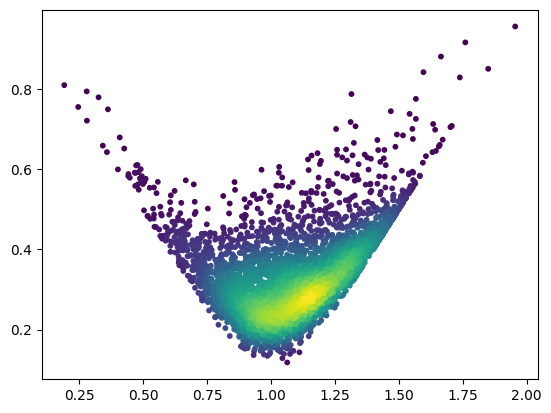

In [5]:
plot_dens_scatter(quasi_dist_x, quasi_dist_y, "Dis Distribution", "dis", "abs_dis")

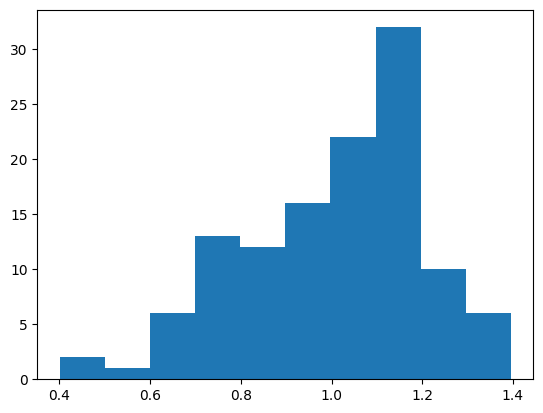

In [53]:
plt.hist(quasi_dist_x[8])
plt.show()

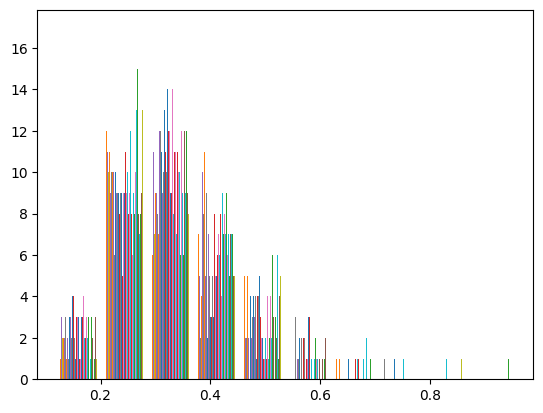

In [7]:
plt.hist(quasi_dist_y)
plt.show()

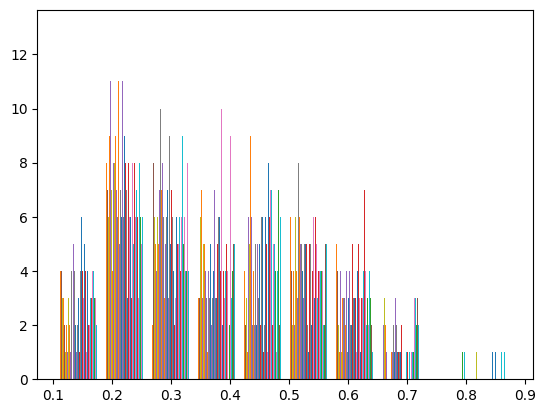

In [8]:
plt.hist(peaks_dist_y)
plt.show()

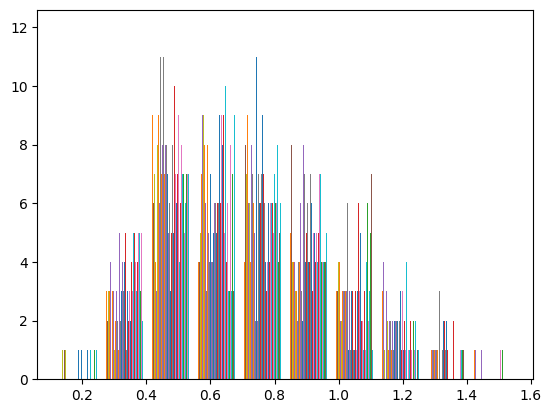

In [9]:
plt.hist(peaks_dist_x)
plt.show()

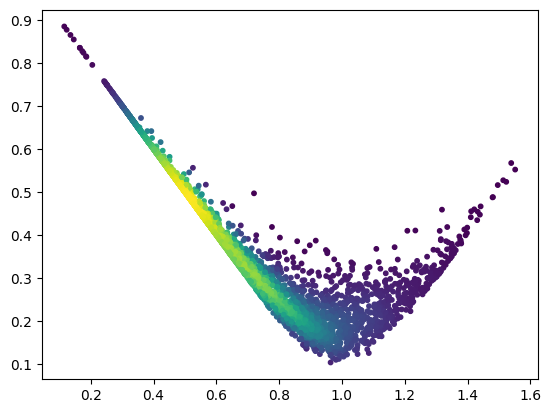

In [10]:
plot_dens_scatter(peaks_dist_x, peaks_dist_y, "Peaks Dis Distribution", "dis", "abs_dis")

Analysing the epoch distribution of the raw Eyes Closed data

In [11]:
quasi_dist_x = np.empty((16, 120))
quasi_dist_y = np.empty((16, 120))
peaks_dist_x = np.empty((16, 120))
peaks_dist_y = np.empty((16, 120))

In [12]:
for i, pth in enumerate((stab_folder / "quasi" / "dis").iterdir()):
    if i%2 != 0:
        continue
    current = np.load(pth)
    quasi_dist_x[int(i/2), :] = current.copy()
for i, pth in enumerate((stab_folder / "quasi" / "abs_dis").iterdir()):
    if i%2 != 0:
        continue
    current = np.load(pth)
    quasi_dist_y[int(i/2), :] = current.copy()
for i, pth in enumerate((stab_folder / "peaks" / "dis").iterdir()):
    if i%2 != 0:
        continue
    current = np.load(pth)
    peaks_dist_x[int(i/2), :] = current.copy()
for i, pth in enumerate((stab_folder / "peaks" / "abs_dis").iterdir()):
    if i%2 != 0:
        continue
    current = np.load(pth)
    peaks_dist_y[int(i/2), :] = current.copy()

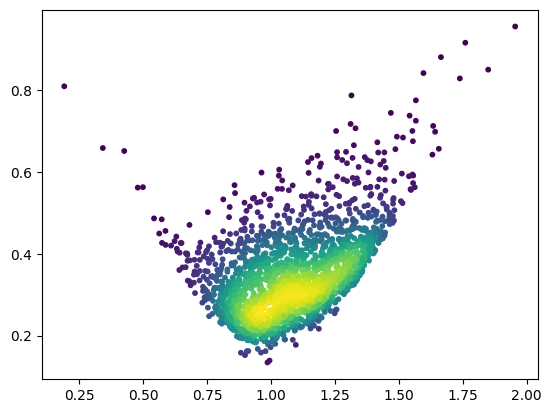

In [13]:
plot_dens_scatter(quasi_dist_x, quasi_dist_y, "Dis Distribution", "dis", "abs_dis")

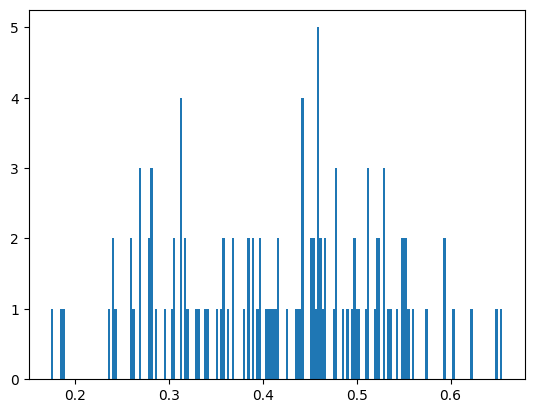

In [14]:
plt.hist(peaks_dist_y[0], bins=200)
plt.show()

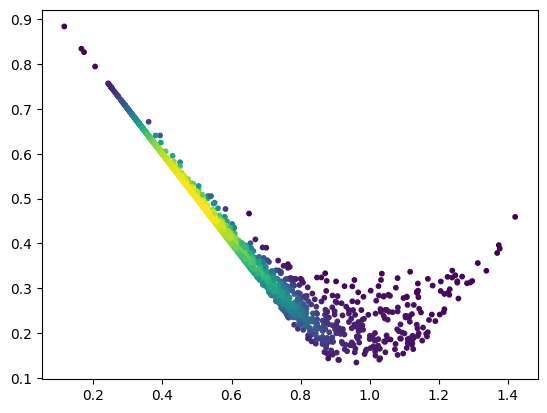

In [15]:
plot_dens_scatter(peaks_dist_x, peaks_dist_y, "Peaks Dis Distribution", "dis", "abs_dis")

Analysing the epoch distribution of the raw Eyes Closed data

In [16]:
quasi_dist_x = np.empty((16, 120))
quasi_dist_y = np.empty((16, 120))
peaks_dist_x = np.empty((16, 120))
peaks_dist_y = np.empty((16, 120))

In [17]:
for i, pth in enumerate((stab_folder / "quasi" / "dis").iterdir()):
    if i%2 == 0:
        continue
    current = np.load(pth)
    quasi_dist_x[int((i-1)/2), :] = current.copy()
for i, pth in enumerate((stab_folder / "quasi" / "abs_dis").iterdir()):
    if i%2 == 0:
        continue
    current = np.load(pth)
    quasi_dist_y[int((i-1)/2), :] = current.copy()
for i, pth in enumerate((stab_folder / "peaks" / "dis").iterdir()):
    if i%2 == 0:
        continue
    current = np.load(pth)
    peaks_dist_x[int((i-1)/2), :] = current.copy()
for i, pth in enumerate((stab_folder / "peaks" / "abs_dis").iterdir()):
    if i%2 == 0:
        continue
    current = np.load(pth)
    peaks_dist_y[int((i-1)/2), :] = current.copy()

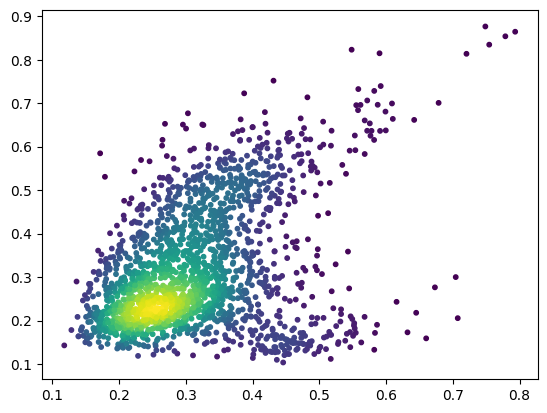

In [18]:
plot_dens_scatter(quasi_dist_y, peaks_dist_y, "Dis Distribution", "dis", "abs_dis")

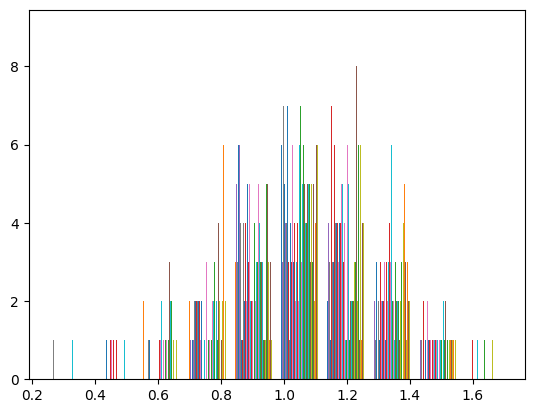

In [19]:
plt.hist(quasi_dist_x)
plt.show()

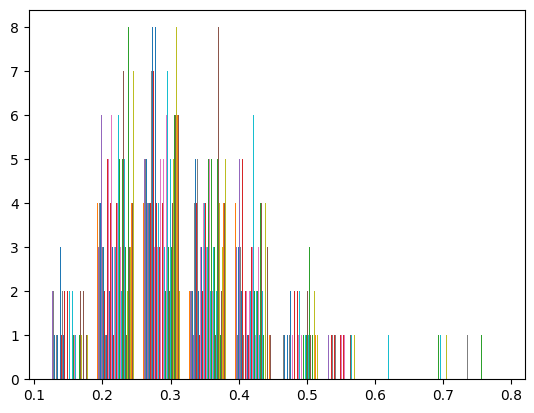

In [20]:
plt.hist(quasi_dist_y)
plt.show()

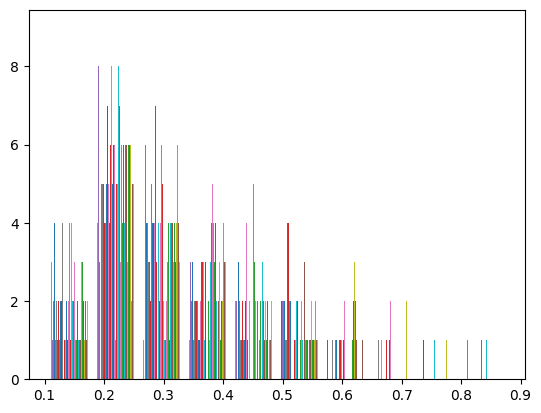

In [21]:
plt.hist(peaks_dist_y)
plt.show()

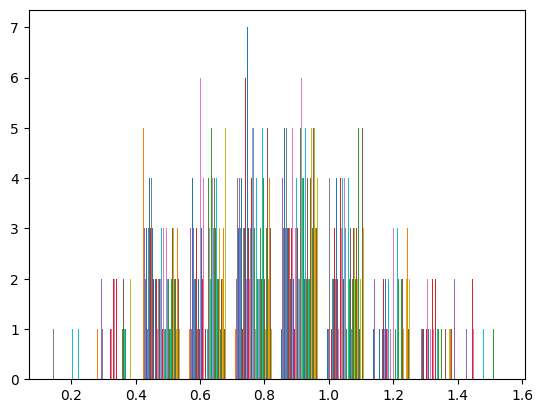

In [22]:
plt.hist(peaks_dist_x)
plt.show()

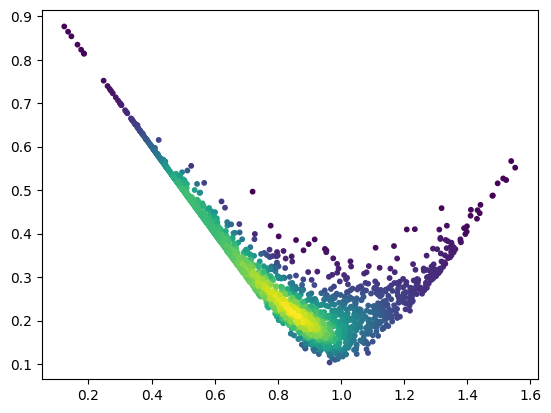

In [23]:
plot_dens_scatter(peaks_dist_x, peaks_dist_y, "Peaks Dis Distribution", "dis", "abs_dis")

Analysing the effect of different parameters

In [24]:
all_results = np.empty(
    (
        16,
        2,
        2,
        2,
        2,
        2,
        12,
        12,
        5
    )
)

In [25]:
for i, pth in enumerate(results_folder.iterdir()):
    current = np.load(pth)
    all_results[i, :, :, :, :, :, :, :] = current.copy()

In [26]:
all_results = np.nan_to_num(all_results)

In [27]:
for i in range(16):
    for q in range(2):
        all_results[i, q, :, :, :, :, :, :] -= all_results[i, q, 0, 0, 0, 0, 0, 0]

Pooled data, to se what works best for both

Best params

In [28]:
print(np.unravel_index(np.argmax(np.mean(np.mean(all_results[:, :, :, :, :, :, :, :, 0], 0), 0)), (2, 2, 2, 2, 12, 12)))
print(np.unravel_index(np.argmax(np.mean(np.mean(all_results[:, :, :, :, :, :, :, :, 1], 0), 0)), (2, 2, 2, 2, 12, 12)))
print(np.unravel_index(np.argmax(np.mean(np.mean(all_results[:, :, :, :, :, :, :, :, 2], 0), 0)), (2, 2, 2, 2, 12, 12)))
print(np.unravel_index(np.argmax(np.mean(np.mean(all_results[:, :, :, :, :, :, :, :, 3], 0), 0)), (2, 2, 2, 2, 12, 12)))
print(np.unravel_index(np.argmax(np.mean(np.mean(all_results[:, :, :, :, :, :, :, :, 4], 0), 0)), (2, 2, 2, 2, 12, 12)))

(0, 0, 0, 0, 11, 11)
(1, 1, 1, 0, 0, 3)
(0, 0, 1, 0, 7, 0)
(0, 1, 0, 0, 11, 3)
(0, 0, 1, 1, 2, 1)


Quasi and peaks distribution of best params solution.

Effect of quasi_channel exclusion

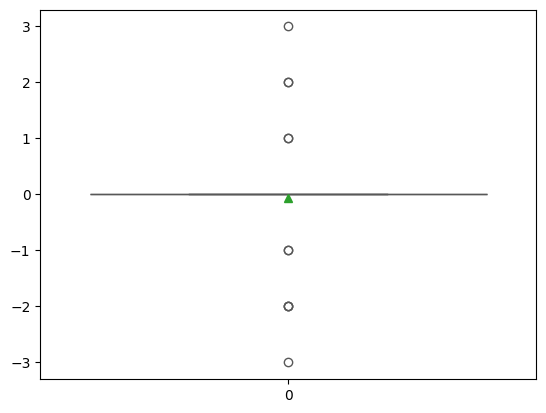

In [29]:
plot_n_boxplots([all_results[:, :, 1, 0, 0, 0, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Effect of Peaks_channel exclusion

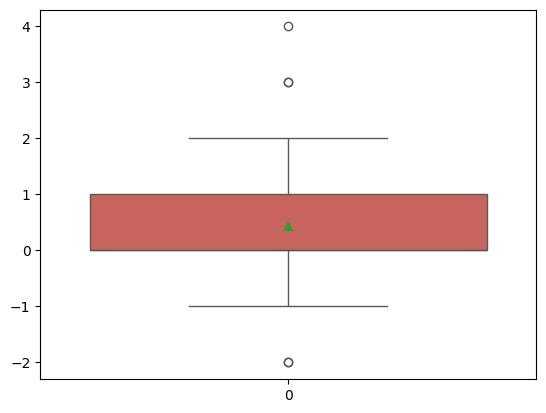

In [30]:
plot_n_boxplots([all_results[:, :, 0, 1, 0, 0, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Effect of channel correlation exclusion

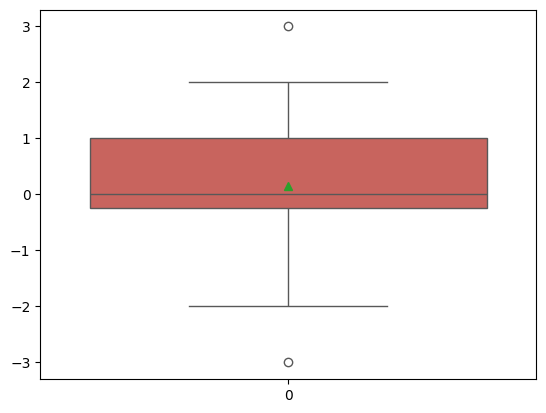

In [31]:
plot_n_boxplots([all_results[:, :, 0, 0, 1, 0, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Effect of quasi epoch exclusion

In [32]:
x_axis = np.arange(0, 12)
y_axis = np.empty(12)
error = np.empty(12)
for i in range(12):
    current = all_results[:, :, 0, 0, 0, 0, i, 0, 1].copy().flatten()
    y_axis[i] = np.mean(current)
    error[i] = np.std(current)

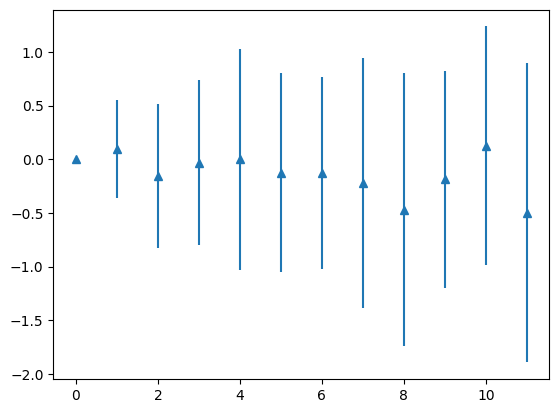

[ 0.       0.09375 -0.15625 -0.03125  0.      -0.125   -0.125   -0.21875
 -0.46875 -0.1875   0.125   -0.5    ]


In [33]:
plt.errorbar(x_axis, y_axis, error, linestyle='None', marker='^')
plt.show()
print(y_axis)

In [34]:
x_axis = np.arange(0, 12)
y_axis = np.empty(12)
error = np.empty(12)
for i in range(12):
    current = all_results[:, :, :, :, :, :, i, :, 1].copy().flatten()
    y_axis[i] = np.mean(current)
    error[i] = np.std(current)

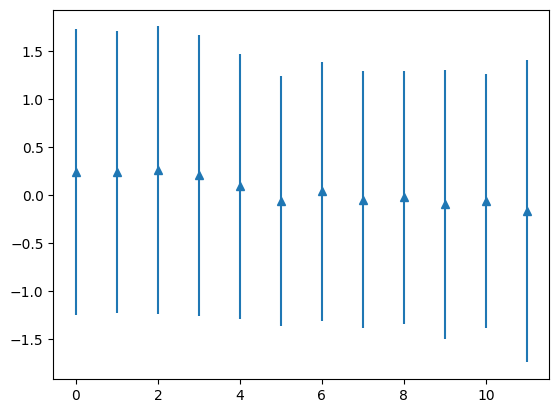

[ 0.24446615  0.2405599   0.26074219  0.20572917  0.08984375 -0.06119792
  0.04101562 -0.04752604 -0.0250651  -0.09667969 -0.05891927 -0.16796875]


In [35]:
plt.errorbar(x_axis, y_axis, error, linestyle='None', marker='^')
plt.show()
print(y_axis)

Effect of peaks epoch exclusion

In [36]:
x_axis = np.arange(0, 12)
y_axis = np.empty(12)
error = np.empty(12)
for i in range(12):
    current = all_results[:, :, 0, 0, 0, 0, 0, i, 1].copy().flatten()
    y_axis[i] = np.mean(current)
    error[i] = np.std(current)

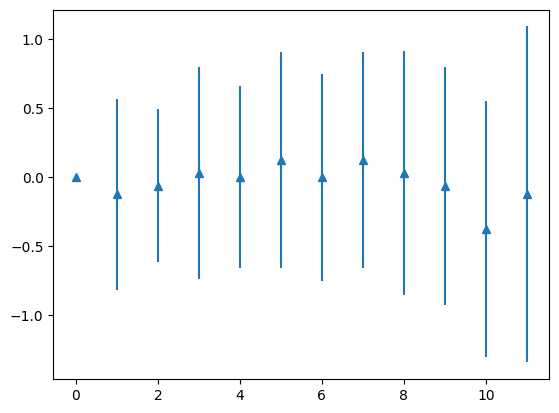

[ 0.      -0.125   -0.0625   0.03125  0.       0.125    0.       0.125
  0.03125 -0.0625  -0.375   -0.125  ]


In [37]:
plt.errorbar(x_axis, y_axis, error, linestyle='None', marker='^')
plt.show()
print(y_axis)

In [38]:
x_axis = np.arange(0, 12)
y_axis = np.empty(12)
error = np.empty(12)
for i in range(12):
    current = all_results[:, :, :, :, :, :, :, i, 1].copy().flatten()
    y_axis[i] = np.mean(current)
    error[i] = np.std(current)

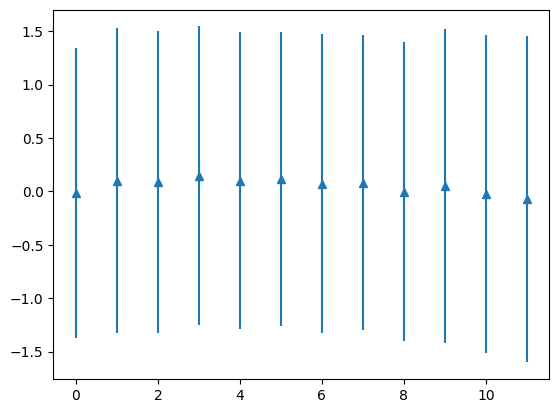

[-0.01757812  0.09928385  0.08626302  0.14453125  0.10058594  0.11458333
  0.07324219  0.08170573 -0.00488281  0.04882812 -0.02897135 -0.07259115]


In [39]:
plt.errorbar(x_axis, y_axis, error, linestyle='None', marker='^')
plt.show()
print(y_axis)